<a href="https://colab.research.google.com/github/prp20/PytorchLearning/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists. Skipping download")
else:
  print(f"{image_path} directory doesn't exist. Creating folder")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f" Downloading zip file from server...")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Extracting Data to {image_path}")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory doesn't exist. Creating folder
Extracting Data to data/pizza_steak_sushi


In [ ]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f" There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

 There are 2 directories and 0 images in data/pizza_steak_sushi
 There are 3 directories and 0 images in data/pizza_steak_sushi/test
 There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
 There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
 There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
 There are 3 directories and 0 images in data/pizza_steak_sushi/train
 There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
 There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
 There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualize Random images in the dataset

data/pizza_steak_sushi/train/steak/3727036.jpg
steak
Random Image Path: data/pizza_steak_sushi/train/steak/3727036.jpg
Random Image class: steak
Random Image dimensions: width:512 height:289


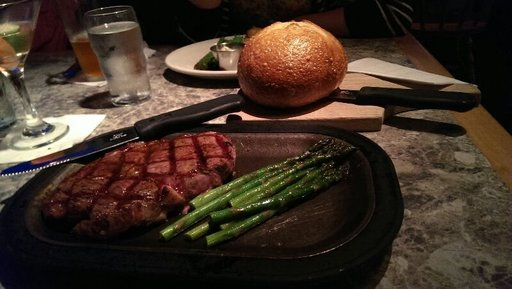

In [ ]:
import random
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random Image Path: {random_image_path}")
print(f"Random Image class: {image_class}")
print(f"Random Image dimensions: width:{img.width} height:{img.height}")
img

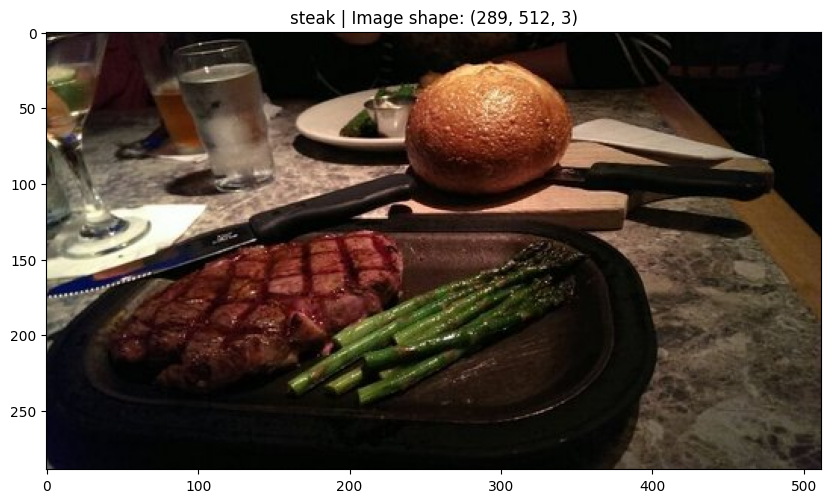

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"{image_class} | Image shape: {img_as_array.shape}")
plt.axis = False

## Transforming Data to Tensors using `torchvision.transforms`

In [ ]:
import torchvision.transforms as transforms
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    # transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img).shape

torch.Size([3, 64, 64])

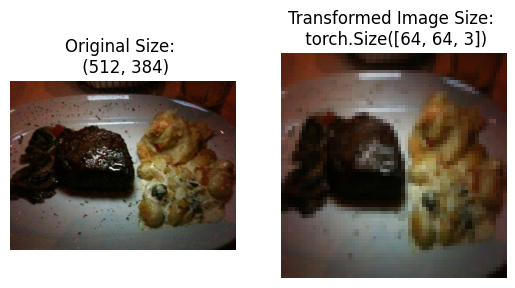

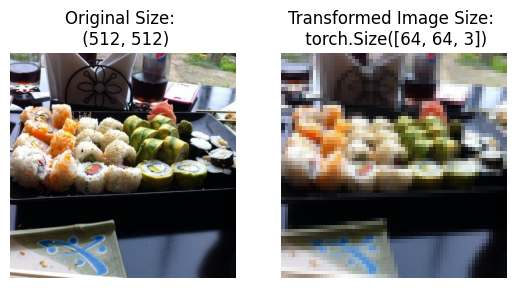

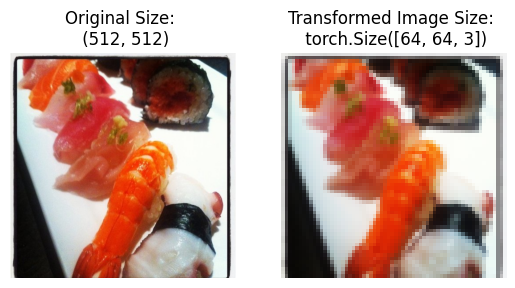

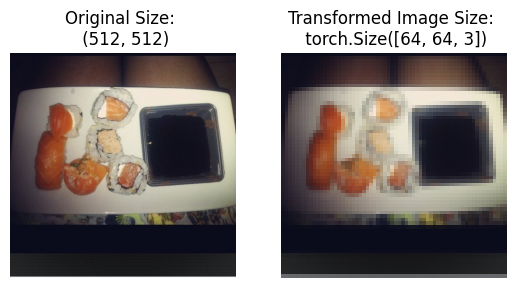

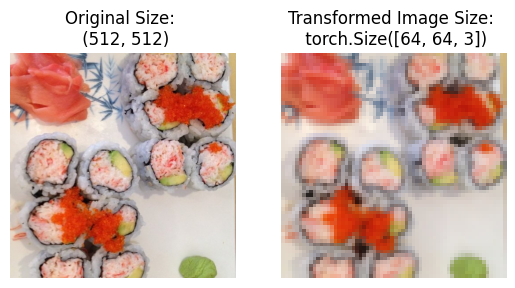

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed = 42):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as img:
      fig, ax = plt.subplots(nrows=1, ncols = 2)
      ax[0].imshow(img)
      ax[0].set_title(f"Original Size: \n {img.size}")
      ax[0].axis(False)

      transformed_img = transform(img).permute(1,2,0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed Image Size: \n {transformed_img.shape}")
      ax[1].axis(False)

plot_transformed_images(image_path_list, data_transform, 5,42)

### Loading dataset from `ImageFolder`

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform = data_transform, target_transform = None)
test_data = datasets.ImageFolder(root=test_dir, transform = data_transform)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image Tensor: \n {img}")
print(f"Image Shape: \n {img.shape}")
print(f"Image Label: \n {class_names[label]}")


Image Tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Dataset Image shape: 
 torch.Size([3, 64, 64])
Permuted Image shape: 
 torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

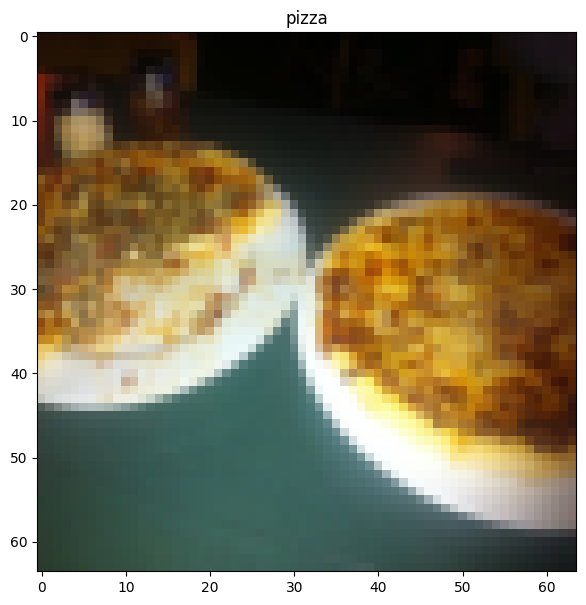

In [ ]:
img_permute = img.permute(1,2,0)

print(f"Dataset Image shape: \n {img.shape}")
print(f"Permuted Image shape: \n {img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(class_names[label])

### Turn Dataset into Dataloader

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 4
NUM_WORKERS = os.cpu_count()

In [ ]:
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
img, label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}")
print(f"Image Label: {label.shape}")

Image Shape: torch.Size([4, 3, 64, 64])
Image Label: torch.Size([4])


## Create a Tiny VGG Model

In [ ]:
from torch import nn
class TinyVGGModelV1(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    # self.conv_block_3 = nn.Sequential(
    #     nn.Conv2d(in_channels = hidden_units,
    #               out_channels = hidden_units,
    #               kernel_size = 3,
    #               stride = 1,
    #               padding = 1),
    #     nn.ReLU(),
    #     nn.Conv2d(in_channels = hidden_units,
    #               out_channels = hidden_units,
    #               kernel_size = 3,
    #               stride = 1,
    #               padding = 1),
    #     nn.ReLU(),
    #     nn.MaxPool2d(kernel_size=2,
    #                  stride=2)
    # )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 16 * 16,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed = 42
model_0 = TinyVGGModelV1(input_shape = 3, hidden_units= 10, output_shape = len(class_names)).to(device)
model_0

TinyVGGModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("File Exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device=device):
  train_loss, train_acc = 0, 0
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      loss = loss_fn(test_pred, y_test)
      test_loss += loss.item()
      test_pred_labels = test_pred.argmax(dim=1)
      test_acc += ((test_pred_labels == y_test).sum().item()/len(test_pred_labels))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device = device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device = device)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed = 42
torch.cuda.manual_seed = 42

# Set number of epochs
NUM_EPOCHS = 10

# # Recreate an instance of TinyVGG
# model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
#                   hidden_units=10,
#                   output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7765 | train_acc: 0.6491 | test_loss: 1.0941 | test_acc: 0.4912
Epoch: 2 | train_loss: 0.7409 | train_acc: 0.6754 | test_loss: 1.1107 | test_acc: 0.4079
Epoch: 3 | train_loss: 0.7192 | train_acc: 0.6886 | test_loss: 1.1871 | test_acc: 0.4518
Epoch: 4 | train_loss: 0.6970 | train_acc: 0.6842 | test_loss: 1.1626 | test_acc: 0.4254
Epoch: 5 | train_loss: 0.6697 | train_acc: 0.7193 | test_loss: 1.2770 | test_acc: 0.4781
Epoch: 6 | train_loss: 0.6284 | train_acc: 0.7588 | test_loss: 1.2572 | test_acc: 0.4518
Epoch: 7 | train_loss: 0.5248 | train_acc: 0.7851 | test_loss: 1.5100 | test_acc: 0.4649
Epoch: 8 | train_loss: 0.4576 | train_acc: 0.8333 | test_loss: 1.4700 | test_acc: 0.4430
Epoch: 9 | train_loss: 0.3771 | train_acc: 0.8728 | test_loss: 1.8136 | test_acc: 0.4649
Epoch: 10 | train_loss: 0.3191 | train_acc: 0.8904 | test_loss: 1.7417 | test_acc: 0.5044
Total training time: 19.197 seconds


## Getting info about the Model using `torchinfo`

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size = [4, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModelV1                           [4, 3]                    --
├─Sequential: 1-1                        [4, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [4, 10, 64, 64]           280
│    └─ReLU: 2-2                         [4, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [4, 10, 64, 64]           910
│    └─ReLU: 2-4                         [4, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [4, 10, 32, 32]           --
├─Sequential: 1-2                        [4, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [4, 10, 32, 32]           910
│    └─ReLU: 2-7                         [4, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [4, 10, 32, 32]           910
│    └─ReLU: 2-9                         [4, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [4, 10, 16, 16]           --
├─Sequentia

## Plotting Loss Curves

In [ ]:
def plot_loss_curves(results):
  train_loss = results['train_loss']
  test_loss = results['test_loss']
  train_acc = results['train_acc']
  test_acc = results['test_acc']

  #plot it out
  epochs = range(len(results['train_loss']))
  plt.figure(figsize = (10,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss, label = "train loss")
  plt.plot(epochs, test_loss, label = "test loss")
  plt.title("Training Loss vs Acuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, train_acc, label = "Train accuracy")
  plt.plot(epochs, test_acc, label = "test accuracy")
  plt.title("Testing Loss vs Acuracy")
  plt.xlabel("Epochs")
  plt.legend()


In [ ]:
model_0_results

{'train_loss': [0.7765261023713831,
  0.7408680254430101,
  0.7191995165327139,
  0.6969629201972694,
  0.6697281350692114,
  0.6283640000119544,
  0.5248199373222234,
  0.4576395730438985,
  0.3771355830627216,
  0.31909935053830085],
 'train_acc': [0.6491228070175439,
  0.6754385964912281,
  0.6885964912280702,
  0.6842105263157895,
  0.7192982456140351,
  0.7587719298245614,
  0.7850877192982456,
  0.8333333333333334,
  0.8728070175438597,
  0.8903508771929824],
 'test_loss': [1.094061209967262,
  1.1107075041846226,
  1.1870920297346617,
  1.1625871564212598,
  1.2769946173617714,
  1.2571881499729658,
  1.5100267184408087,
  1.4700078948547965,
  1.813567075290178,
  1.7416580507629795],
 'test_acc': [0.4912280701754386,
  0.40789473684210525,
  0.4517543859649123,
  0.4254385964912281,
  0.47807017543859653,
  0.4517543859649123,
  0.46491228070175444,
  0.44298245614035087,
  0.46491228070175444,
  0.5043859649122807]}

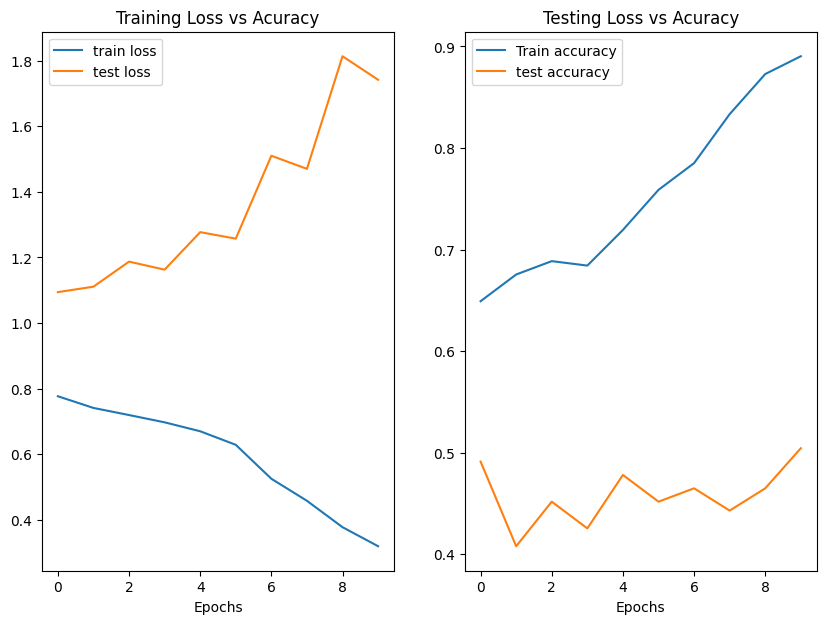

In [ ]:
plot_loss_curves(model_0_results)

## Data Augmentation being added to datasets

In [ ]:
from torchvision import datasets
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transform_trivial)

test_data_augmented = datasets.ImageFolder(root = test_dir,
                                            transform = test_transform_trivial)

In [ ]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32

torch.manual_seed = 42
train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle=True)

test_dataloader_augmented = DataLoader(dataset = test_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle=False)

In [ ]:
# Set random seeds
torch.manual_seed = 42
torch.cuda.manual_seed = 42

# Set number of epochs
NUM_EPOCHS = 10

# # Recreate an instance of TinyVGG
model_1 = TinyVGGModelV1(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1141 | train_acc: 0.2930 | test_loss: 1.0961 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.1086 | train_acc: 0.3047 | test_loss: 1.0709 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.1024 | train_acc: 0.2891 | test_loss: 1.0883 | test_acc: 0.5634
Epoch: 4 | train_loss: 1.0969 | train_acc: 0.4219 | test_loss: 1.1048 | test_acc: 0.2708
Epoch: 5 | train_loss: 1.0767 | train_acc: 0.5469 | test_loss: 1.1273 | test_acc: 0.3125
Epoch: 6 | train_loss: 1.0967 | train_acc: 0.4336 | test_loss: 1.1289 | test_acc: 0.3229
Epoch: 7 | train_loss: 1.0414 | train_acc: 0.5430 | test_loss: 1.0594 | test_acc: 0.3920
Epoch: 8 | train_loss: 1.0617 | train_acc: 0.4805 | test_loss: 1.0434 | test_acc: 0.4650
Epoch: 9 | train_loss: 1.0462 | train_acc: 0.4531 | test_loss: 1.0482 | test_acc: 0.3930
Epoch: 10 | train_loss: 0.9084 | train_acc: 0.5703 | test_loss: 1.0644 | test_acc: 0.4242
Total training time: 10.404 seconds


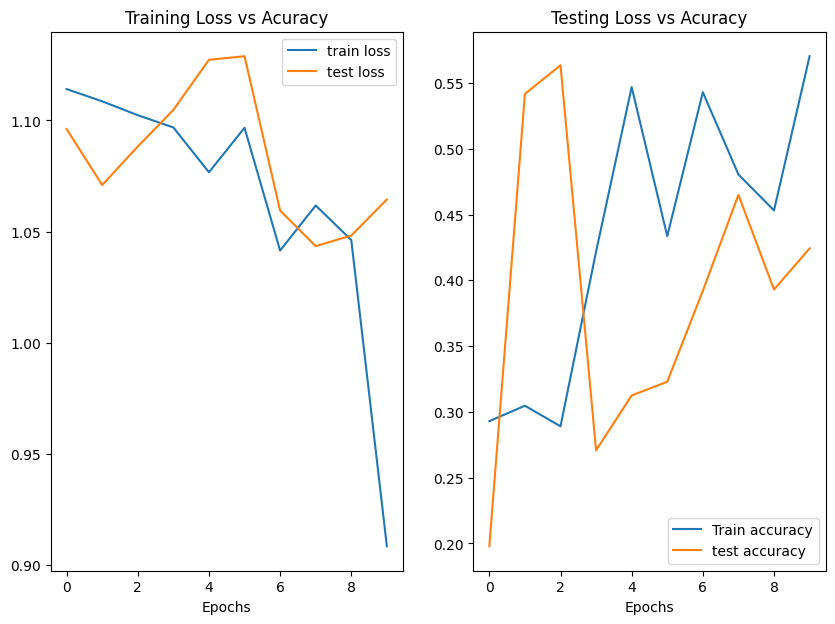

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
!wget https://pixabay.com/photos/pizza-italian-homemade-cheese-3007395/ -O pizza.jpg

--2023-09-27 16:28:25--  https://pixabay.com/photos/pizza-italian-homemade-cheese-3007395/
Resolving pixabay.com (pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::6812:2860, ...
Connecting to pixabay.com (pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-09-27 16:28:25 ERROR 403: Forbidden.



tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.1333, 0.0980, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.1686, 0.0510, 0.0196],
         [0.0000, 0.0000, 0.0039,  ..., 0.1686, 0.0353, 0.0118],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0235, 0.0314],
         [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0275, 0.0314],
         [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0275, 0.0314]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.2078, 0.1569, 0.0706],
         [0.0039, 0.0039, 0.0039,  ..., 0.2353, 0.1020, 0.0627],
         [0.0000, 0.0000, 0.0039,  ..., 0.2235, 0.0706, 0.0431],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0392, 0.0275, 0.0353],
         [0.0039, 0.0039, 0.0039,  ..., 0.0392, 0.0314, 0.0353],
         [0.0039, 0.0039, 0.0039,  ..., 0.0392, 0.0314, 0.0353]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.2353, 0.1765, 0.0824],
         [0.0039, 0.0039, 0.0039,  ..., 0.2667, 0.1255, 0.0784],
         [0.0000, 0.0000, 0.0039,  ..., 0.2588, 0.0902, 0.

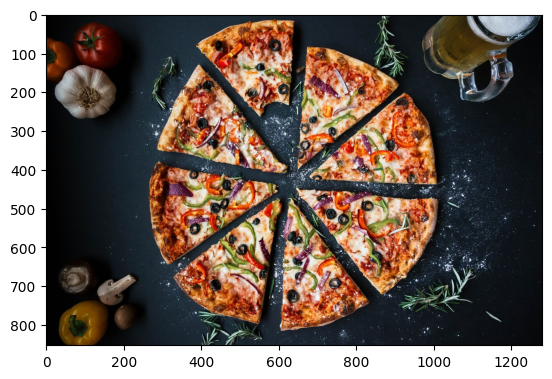

In [ ]:
import torchvision

customer_img_path = "/content/pizza-3007395_1280.jpg"
custom_image = torchvision.io.read_image(customer_img_path).type(torch.float32) /255.
plt.imshow(custom_image.permute(1, 2, 0))
custom_image

In [ ]:
custom_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])
custom_transformed_image = custom_transform(custom_image)

In [ ]:
model_1.eval()
with torch.inference_mode():
  pred = model_1(custom_transformed_image.unsqueeze(0).to(device))
  print(pred)

tensor([[-0.3874, -0.1714, -0.1739]], device='cuda:0')


In [ ]:
custom_image_pred_probs = torch.softmax(pred, dim =1)
custom_image_pred_label = class_names[torch.argmax(custom_image_pred_probs, dim =1)]
custom_image_pred_label

'steak'

In [ ]:
from typing import List

def pred_plot_image(image_path: str,
                    model: torch.nn.Module,
                    class_names: List[str] = None,
                    transform = None,
                    device = device):
  custom_image = torchvision.io.read_image(image_path).type(torch.float32) /255.
  if transform:
    custom_image = transform(custom_image)
  model.eval()
  with torch.inference_mode():
    pred = model(custom_image.unsqueeze(0).to(device))
  custom_image_pred_probs = torch.softmax(pred, dim =1)
  custom_image_pred_label = class_names[torch.argmax(custom_image_pred_probs, dim =1)]
  plt.imshow(custom_image.squeeze().permute(1,2,0))
  plt.title(custom_image_pred_label)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


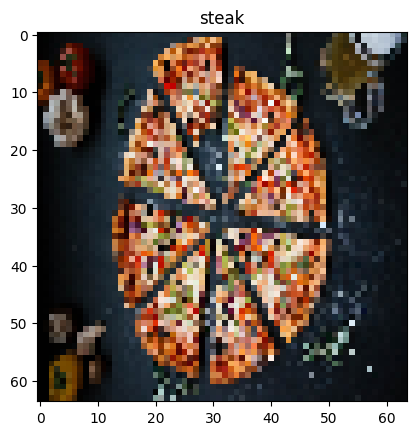

In [ ]:
pred_plot_image(customer_img_path, model_1, class_names, custom_transform, device)